In [29]:
# TRAIN_START_DATE = '2009-04-01'
# TRAIN_END_DATE = '2021-01-01'
# TEST_START_DATE = '2021-01-01'
# TEST_END_DATE = '2022-06-01'
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.config_tickers import DOW_30_TICKER

import pandas as pd
import numpy as np

# TRAIN_START_DATE = '2010-01-01'
# TRAIN_END_DATE = '2021-10-01'
# TEST_START_DATE = '2021-10-01'
# TEST_END_DATE = '2024-03-01'

# TODO extend this test date
PLOT_DATES_TEST_START = '2022-01-03'
PLOT_DATES_TEST_END = '2023-12-29'
ensemble_result_file = "result20222023.csv"

# TODO extend this test date
# PLOT_DATES_TEST_START = '2019-01-03'
# PLOT_DATES_TEST_END = '2020-12-28'
# ensemble_result_file = "result20192022.csv"
# value_to_remove = "DOW"
# # Create a new list without the specified string
# DOW_30_TICKER = [x for x in DOW_30_TICKER if x != value_to_remove]


# TODO Try a longer date range, Some columns have issues over this date range
# Value to be removed
# value_to_remove = "DOW"
# # Create a new list without the specified string
# DOW_30_TICKER = [x for x in DOW_30_TICKER if x != value_to_remove]
# print(DOW_30_TICKER)
# PLOT_DATES_TEST_START = '2015-01-03'
# PLOT_DATES_TEST_END = '2023-12-29'




df = YahooDownloader(start_date = PLOT_DATES_TEST_START,
                     end_date = PLOT_DATES_TEST_END,
                     ticker_list = DOW_30_TICKER).fetch_data()


# # They replace close price with adjusted close price
# df = YahooDownloader(start_date = PLOT_DATES_TEST_START,
#                      end_date = PLOT_DATES_TEST_END,
#                      ticker_list = [
#     "AMGN",
#     "AAPL",
#     "AMAT",
#     "INTC",
#     "PCAR",
#     "PAYX",
#     "MSFT"]).fetch_data()

print(df.head())


# Count rows with any null values
null_rows_count = df.isnull().any(axis=1).sum()

print(f"Number of rows containing null values: {null_rows_count}")


print("Check for o-nulls")
print(df.notnull().all().all())

assert df.notnull().all().all()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Shape of DataFrame:  (15000, 8)
         date        open        high         low       close     volume  \
0  2022-01-03  177.830002  182.880005  177.710007  179.273621  104487900   
1  2022-01-03  223.630005  226.970001  222.029999  207.807144    2742800   
2  2022-01-03  164.509995  168.399994  164.399994  161.699921    3236400   
3  2022-01-03  204.000000  210.550003  203.339996  207.860001    9060200   
4  2022-01-03  207.330002  208.600006  205.800003  195.760956    2055600   

    tic  day  
0  AAPL    0  
1  AMGN    0  
2   AXP    0  
3    BA    0  
4   CAT    0  
Number of rows containing null values: 0
Check for o-nulls
True


In [30]:
def calculate_final_investment(X, B, initial_investment, buy_cost=0.001, sell_cost=0.001):
    # Ensure both dataframes have the same index
    assert X.index.equals(B.index), "The indices of X and B must be the same."

    # Calculate log returns
    log_returns = np.log(X)
    
    # Calculate weighted log returns
    weighted_log_returns = (log_returns * B).sum(axis=1)
    
    # Calculate transaction costs
    transaction_costs = (B.diff().abs() * buy_cost).sum(axis=1) + (B.diff().abs() * sell_cost).sum(axis=1)
    transaction_costs.iloc[0] = 0  # No transaction cost for the first period
    
    # Adjust the returns by subtracting the transaction costs
    adjusted_weighted_log_returns = weighted_log_returns - transaction_costs
    
    # Calculate cumulative log returns
    cumulative_log_returns = adjusted_weighted_log_returns.cumsum()
    
    # Calculate cumulative return factor
    cumulative_return_factor = np.exp(cumulative_log_returns)
    
    # Calculate the final investment amount
    final_investment = initial_investment * cumulative_return_factor
    
    return final_investment

In [31]:
# Current and Target Weights
current_weights = pd.Series({'A': 0.5, 'B': 0.3, 'C': 0.2})
target_weights = pd.Series({'A': 0.4, 'B': 0.4, 'C': 0.2})

# Portfolio Value
portfolio_value = 100000

# Current Values
current_values = current_weights * portfolio_value

# Target Values
target_values = target_weights * portfolio_value

# Calculate Buy and Sell Amounts
buy_amounts = target_values[target_values > current_values] - current_values[target_values > current_values]
sell_amounts = current_values[current_values > target_values] - target_values[current_values > target_values]

print("Buy Amounts:\n", buy_amounts)
print("Sell Amounts:\n", sell_amounts)

Buy Amounts:
 B    10000.0
dtype: float64
Sell Amounts:
 A    10000.0
dtype: float64


In [32]:
import pandas as pd


df = pd.DataFrame(df)

print(df.dtypes)

# Pivot the DataFrame
pivot_df = df.pivot(index='date', columns='tic', values='close')

print(pivot_df)

pivot_df.index = pd.to_datetime(pivot_df.index)



# If we pivot and there are nulls, it means some dates dont have all prices
# Count rows with any null values
# Identify columns with null values
columns_with_nulls = df.columns[df.isnull().any()].tolist()

# Identify rows with null values
rows_with_nulls = pivot_df[pivot_df.isnull().any(axis=1)]

print("Columns with null values:", columns_with_nulls)
print("Rows with null values:\n", rows_with_nulls)

print("Check for o-nulls")
print(pivot_df.notnull().all().all())


assert pivot_df.notnull().all().all()


date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
tic        object
day         int32
dtype: object
tic               AAPL        AMGN         AXP          BA         CAT  \
date                                                                     
2022-01-03  179.273621  207.807144  161.699921  207.860001  195.760956   
2022-01-04  176.998322  208.861359  166.890915  213.630005  206.239334   
2022-01-05  172.290237  206.386276  165.112549  213.070007  207.818665   
2022-01-06  169.414108  206.413757  166.625549  211.339996  209.937042   
2022-01-07  169.581543  208.357178  168.051849  215.500000  212.017624   
...                ...         ...         ...         ...         ...   
2023-12-21  193.944031  273.305603  182.603531  262.019989  286.516785   
2023-12-22  192.868149  278.031433  183.374329  260.440002  286.803223   
2023-12-26  192.320206  277.777069  183.759689  262.790009  292.008698   
2023-12-27  192.419830  280.

<Axes: xlabel='date'>

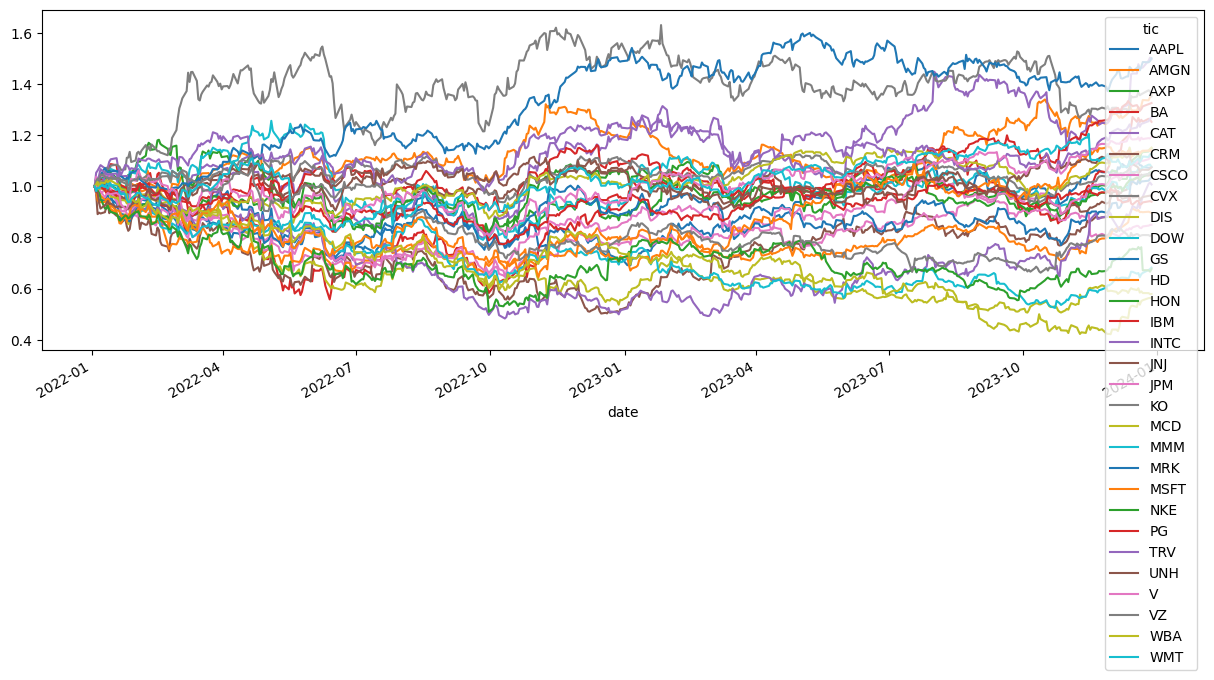

In [33]:
import matplotlib.pyplot as plt
# plot normalized prices of these stocks
(pivot_df / pivot_df.iloc[0,:]).plot()

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:233: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_al

Summary:
    Profit factor: 1.06
    Sharpe ratio: 0.49 ± 0.75
    Ulcer index: 0.90
    Information ratio (wrt benchmark): 0.42
    Benchmark sharpe: 0.32 ± 0.73
    Appraisal ratio (wrt benchmark): 0.38 ± 0.71
    Beta / Alpha: 1.24 / 10.087%
    Annualized return: 16.52%
    Annualized volatility: 33.48%
    Longest drawdown: 312 days
    Max drawdown: 38.49%
    Winning days: 49.3%
    Annual turnover: 299.7
        


[<Axes: xlabel='date', ylabel='Total wealth'>,
 <Axes: xlabel='date', ylabel='weights'>]

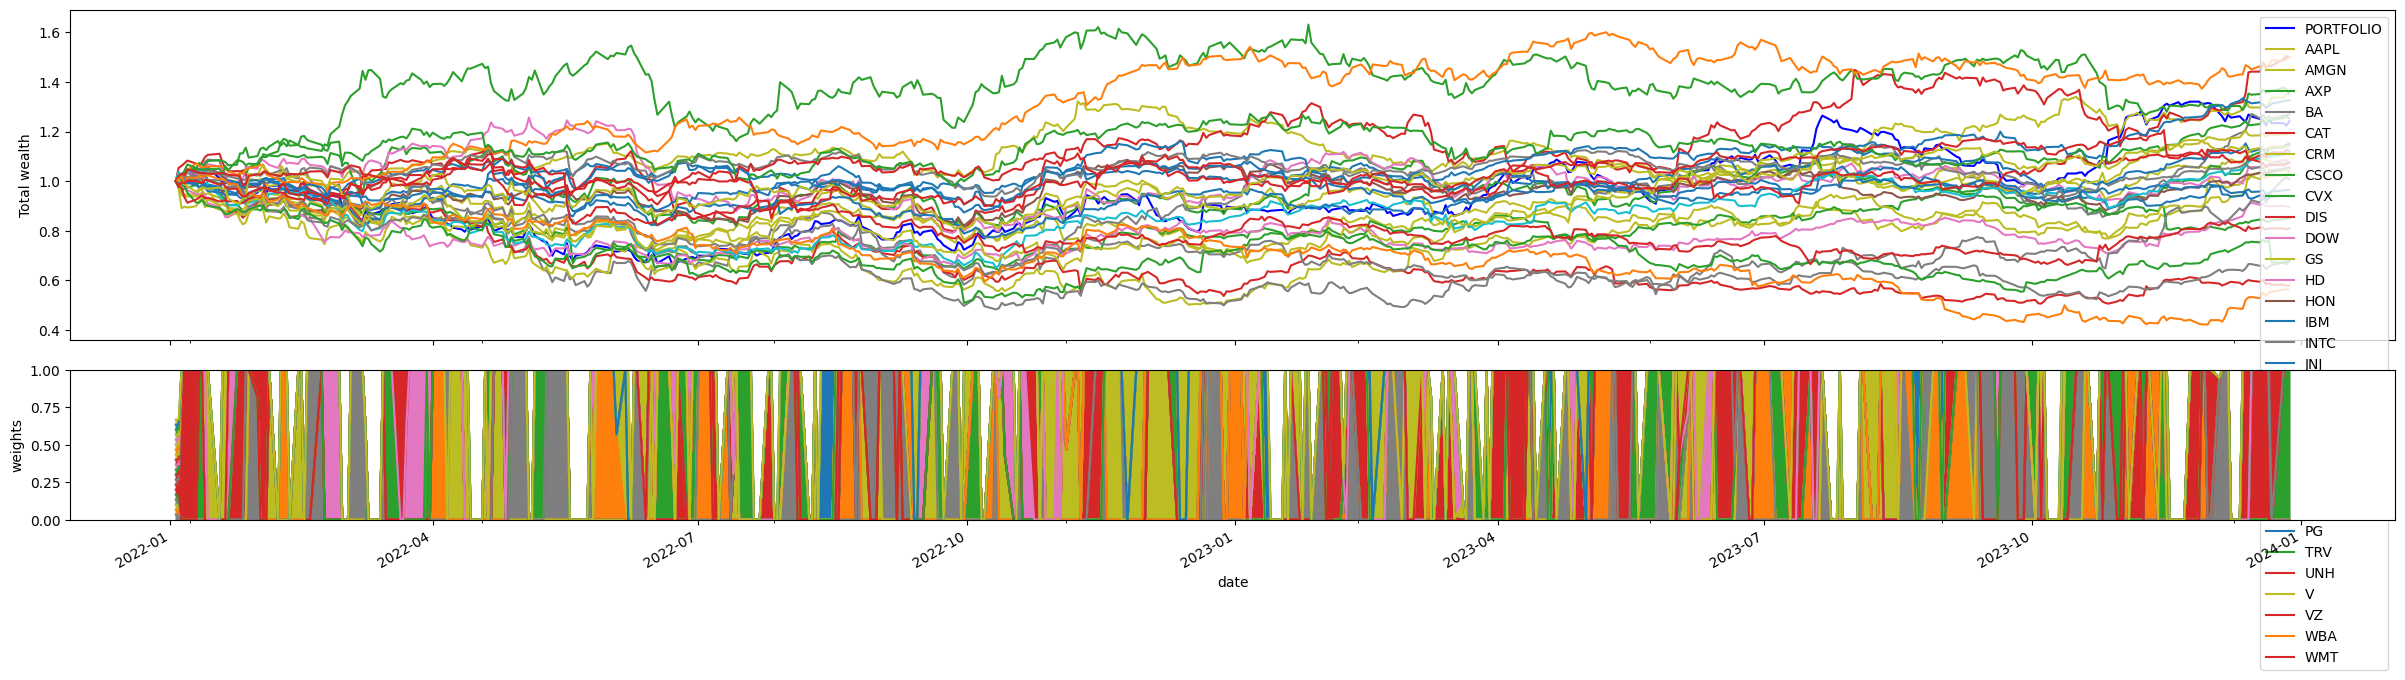

In [34]:
from online_algos import OLMAR, BCRP, CRP, BAH, TCO1, UP


# Simple Moving Average (SMA) vs. Exponential Moving Average (EMA)
# Simple Moving Average (SMA)
# Calculation: Averages the prices over a specified period.

# Sensitivity: Less sensitive to recent price changes because each period has equal weight.

# Lag: More lag compared to EMA, meaning it reacts slower to price changes.

# Use Case: Suitable for identifying longer-term trends.

# Exponential Moving Average (EMA)
# Calculation: Gives more weight to recent prices, making it more responsive.

# Sensitivity: More sensitive to recent price changes due to the weighting factor.

# Lag: Less lag compared to SMA, meaning it reacts faster to price changes.

# Use Case: Better for short-term trading strategies and identifying rapid changes.


algo = OLMAR(window=5, eps=10, ma_type="SMA")

result_olmar = algo.run(pivot_df)
print(result_olmar.summary())
result_olmar.plot()

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.06
    Sharpe ratio: 0.49 ± 0.75
    Ulcer index: 0.90
    Information ratio (wrt benchmark): 0.42
    Benchmark sharpe: 0.32 ± 0.73
    Appraisal ratio (wrt benchmark): 0.38 ± 0.71
    Beta / Alpha: 1.24 / 10.087%
    Annualized return: 16.52%
    Annualized volatility: 33.48%
    Longest drawdown: 312 days
    Max drawdown: 38.49%
    Winning days: 49.3%
    Annual turnover: 299.7
        
Summary:
    Profit factor: 0.91
    Sharpe ratio: -0.40 ± 0.74
    Ulcer index: -0.39
    Information ratio (wrt benchmark): -0.69
    Benchmark sharpe: 0.32 ± 0.73
    Appraisal ratio (wrt benchmark): -0.74 ± 0.71
    Beta / Alpha: 1.24 / -19.962%
    Annualized return: -13.46%
    Annualized volatility: 33.61%
    Longest drawdown: 490 days
    Max drawdown: 45.44%
    Winning days: 46.3%
    Annual turnover: 299.7
        


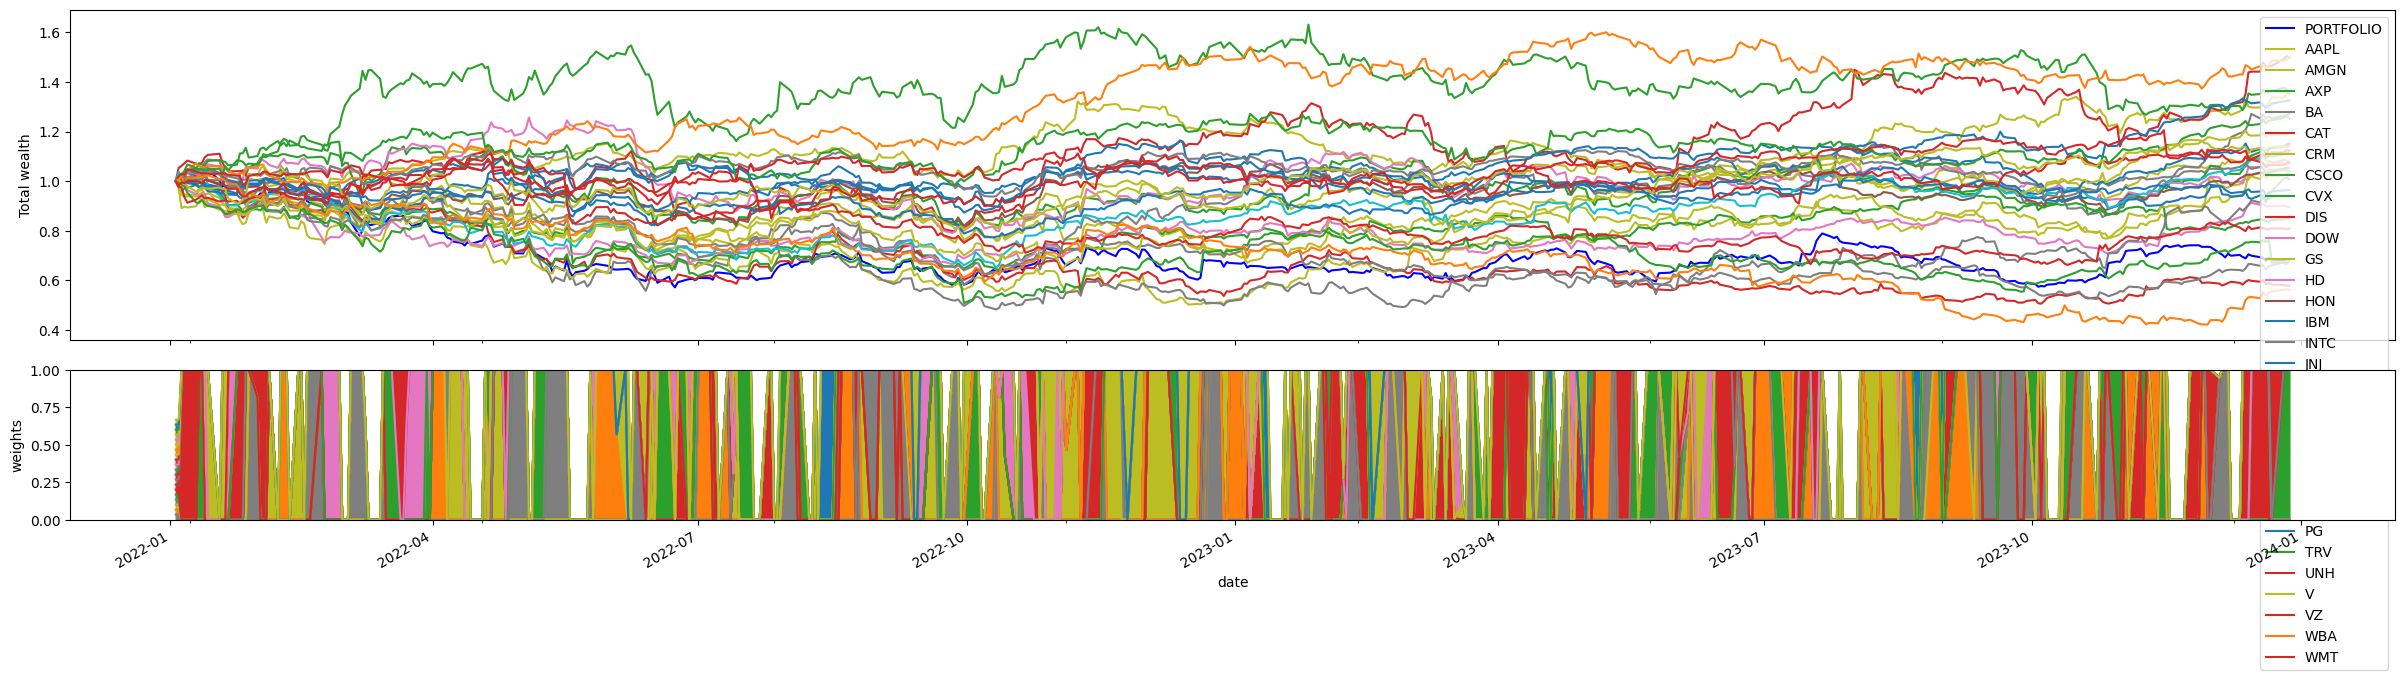

In [35]:
olmar_B = result_olmar.B
olmar_X = result_olmar.X
print(result_olmar.summary())


result_olmar.fee = 0.001
print(result_olmar.summary())
result_olmar.plot()
olmar_B_fee = result_olmar.B
olmar_X_fee = result_olmar.X


# Cimpare results to makret

Summary:
    Profit factor: 0.96
    Sharpe ratio: -0.07 ± 1.01
    Ulcer index: -0.11
    Information ratio (wrt benchmark): 0.13
    Benchmark sharpe: -0.29 ± 1.03
    Appraisal ratio (wrt benchmark): 0.20 ± 1.01
    Beta / Alpha: 1.28 / 5.069%
    Annualized return: -2.37%
    Annualized volatility: 36.16%
    Longest drawdown: 218 days
    Max drawdown: 37.40%
    Winning days: 49.2%
    Annual turnover: 212.5
        
Summary:
    Profit factor: 0.87
    Sharpe ratio: -0.65 ± 1.11
    Ulcer index: -0.88
    Information ratio (wrt benchmark): -0.68
    Benchmark sharpe: -0.29 ± 1.03
    Appraisal ratio (wrt benchmark): -0.63 ± 1.01
    Beta / Alpha: 1.28 / -16.245%
    Annualized return: -23.62%
    Annualized volatility: 36.30%
    Longest drawdown: 218 days
    Max drawdown: 44.97%
    Winning days: 48.0%
    Annual turnover: 212.5


When factoring in the fees, our portiolo is underperfomring the market in sharpe ratio and returns

Net Worth Over Time:
date
2022-01-03    1.000000e+06
2022-01-04    1.007582e+06
2022-01-05    1.015298e+06
2022-01-06    1.025647e+06
2022-01-07    1.035812e+06
                  ...     
2023-12-21    1.246394e+06
2023-12-22    1.232849e+06
2023-12-26    1.232620e+06
2023-12-27    1.222465e+06
2023-12-28    1.241749e+06
Length: 500, dtype: float64
             date        open        high         low       close     volume  \
0      2022-01-03  177.830002  182.880005  177.710007  179.273621  104487900   
1      2022-01-03  223.630005  226.970001  222.029999  207.807144    2742800   
2      2022-01-03  164.509995  168.399994  164.399994  161.699921    3236400   
3      2022-01-03  204.000000  210.550003  203.339996  207.860001    9060200   
4      2022-01-03  207.330002  208.600006  205.800003  195.760956    2055600   
...           ...         ...         ...         ...         ...        ...   
14995  2023-12-28  523.469971  527.869995  522.940002  518.790710    2001000   
14996  20

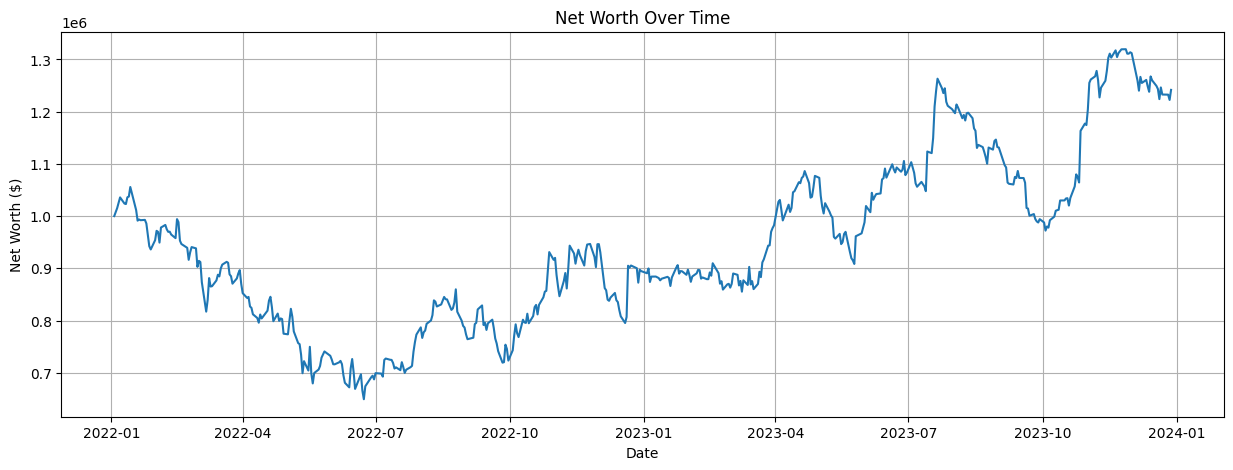

Net Worth Over Time:
date
2022-01-03    1.000000e+06
2022-01-04    1.007582e+06
2022-01-05    1.013337e+06
2022-01-06    1.023666e+06
2022-01-07    1.033811e+06
                  ...     
2023-12-21    6.905811e+05
2023-12-22    6.817117e+05
2023-12-26    6.802236e+05
2023-12-27    6.746191e+05
2023-12-28    6.852614e+05
Length: 500, dtype: float64
             date        open        high         low       close     volume  \
0      2022-01-03  177.830002  182.880005  177.710007  179.273621  104487900   
1      2022-01-03  223.630005  226.970001  222.029999  207.807144    2742800   
2      2022-01-03  164.509995  168.399994  164.399994  161.699921    3236400   
3      2022-01-03  204.000000  210.550003  203.339996  207.860001    9060200   
4      2022-01-03  207.330002  208.600006  205.800003  195.760956    2055600   
...           ...         ...         ...         ...         ...        ...   
14995  2023-12-28  523.469971  527.869995  522.940002  518.790710    2001000   
14996  20

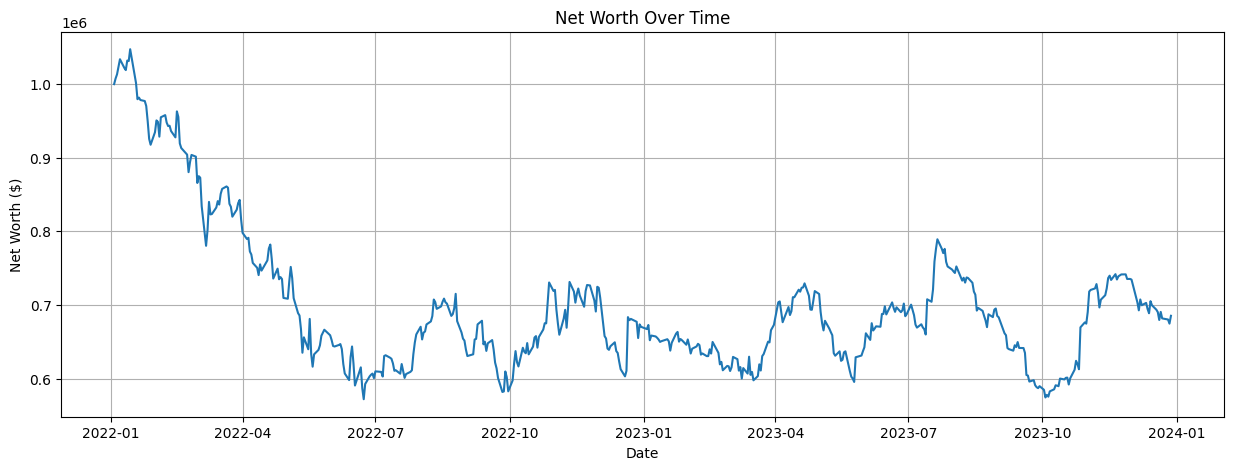

In [36]:
# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time
net_worth_olmar = calculate_final_investment(olmar_X, olmar_B, initial_investment, 0, 0)

print("Net Worth Over Time:")
print(net_worth_olmar)

s = pd.Series(net_worth_olmar, name='OLMAR_olmar')

# Convert Series to DataFrame
olmar_df = s.to_frame()

print(df)

# Plotting the net worth over time
plt.plot(net_worth_olmar.index, net_worth_olmar)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()


# with fees
# Calculate final investment amount
# Calculate the net worth over time
# TODO even a small fee on OLMAR seems to kill it
net_worth_olmar_fee = calculate_final_investment(olmar_X_fee, olmar_B_fee, initial_investment, 0.001, 0)

print("Net Worth Over Time:")
print(net_worth_olmar_fee)

s = pd.Series(net_worth_olmar_fee, name='OLMAR_olmar')

# Convert Series to DataFrame
olmar_df = s.to_frame()

print(df)

# Plotting the net worth over time
plt.plot(net_worth_olmar_fee.index, net_worth_olmar_fee)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

# Other stuff
=======================================

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

tic         AAPL  AMGN  AXP   BA       CAT  CRM          CSCO  CVX  \
date                                                                 
2022-01-03   0.0   0.0  0.0  0.0  0.489979  0.0  3.810573e-16  0.0   
2022-01-04   0.0   0.0  0.0  0.0  0.489979  0.0  3.810573e-16  0.0   
2022-01-05   0.0   0.0  0.0  0.0  0.489979  0.0  3.810573e-16  0.0   
2022-01-06   0.0   0.0  0.0  0.0  0.489979  0.0  3.810573e-16  0.0   
2022-01-07   0.0   0.0  0.0  0.0  0.489979  0.0  3.810573e-16  0.0   
...          ...   ...  ...  ...       ...  ...           ...  ...   
2023-12-21   0.0   0.0  0.0  0.0  0.489979  0.0  3.810573e-16  0.0   
2023-12-22   0.0   0.0  0.0  0.0  0.489979  0.0  3.810573e-16  0.0   
2023-12-26   0.0   0.0  0.0  0.0  0.489979  0.0  3.810573e-16  0.0   
2023-12-27   0.0   0.0  0.0  0.0  0.489979  0.0  3.810573e-16  0.0   
2023-12-28   0.0   0.0  0.0  0.0  0.489979  0.0  3.810573e-16  0.0   

tic                  DIS  DOW  ...       MRK          MSFT  NKE            PG  \
date    

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\result.py:277: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[i] > peak:
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\result.py:278: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  peak = x[i]


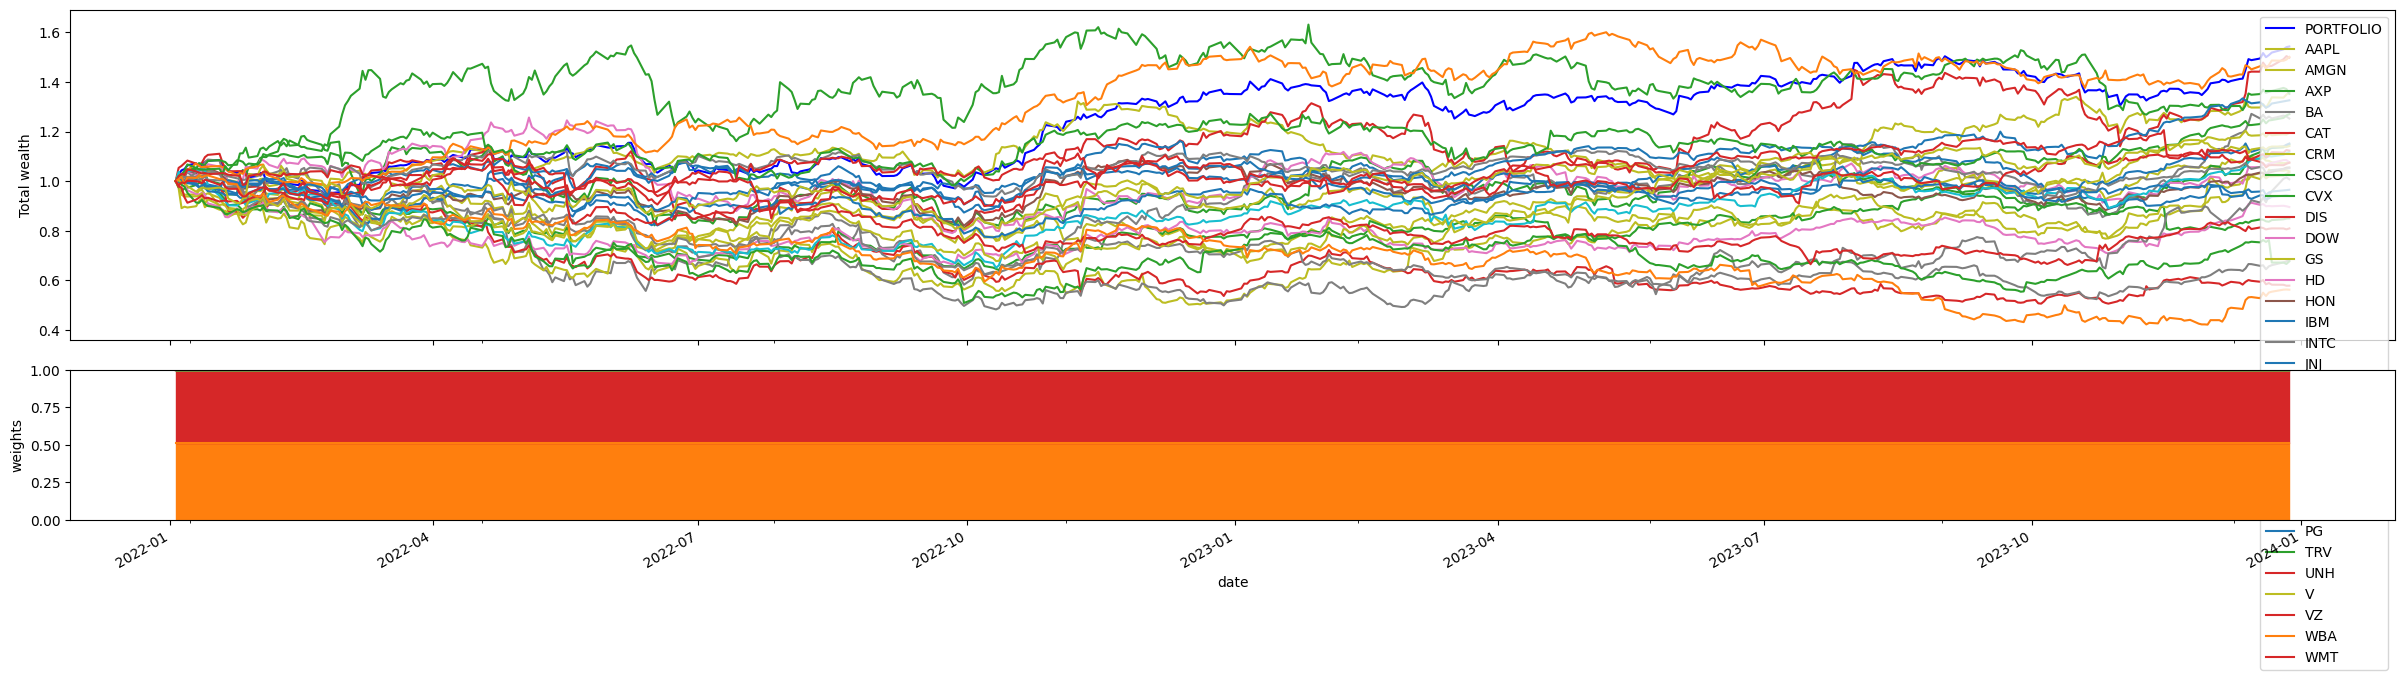

In [37]:
algo = BCRP(no_cash=True)
result = algo.run(pivot_df)

bcrp_B = result.B
print(result.B)
bcrp_X = result.X
print(result.X)
print(result.summary())
result.plot();

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.18
    Sharpe ratio: 1.12 ± 0.90
    Ulcer index: 3.30
    Information ratio (wrt benchmark): 1.13
    Benchmark sharpe: 0.32 ± 0.73
    Appraisal ratio (wrt benchmark): 1.23 ± 0.72
    Beta / Alpha: 0.81 / 17.565%
    Annualized return: 21.73%
    Annualized volatility: 19.47%
    Longest drawdown: 128 days
    Max drawdown: 16.55%
    Winning days: 53.1%
    Annual turnover: 2.0
        


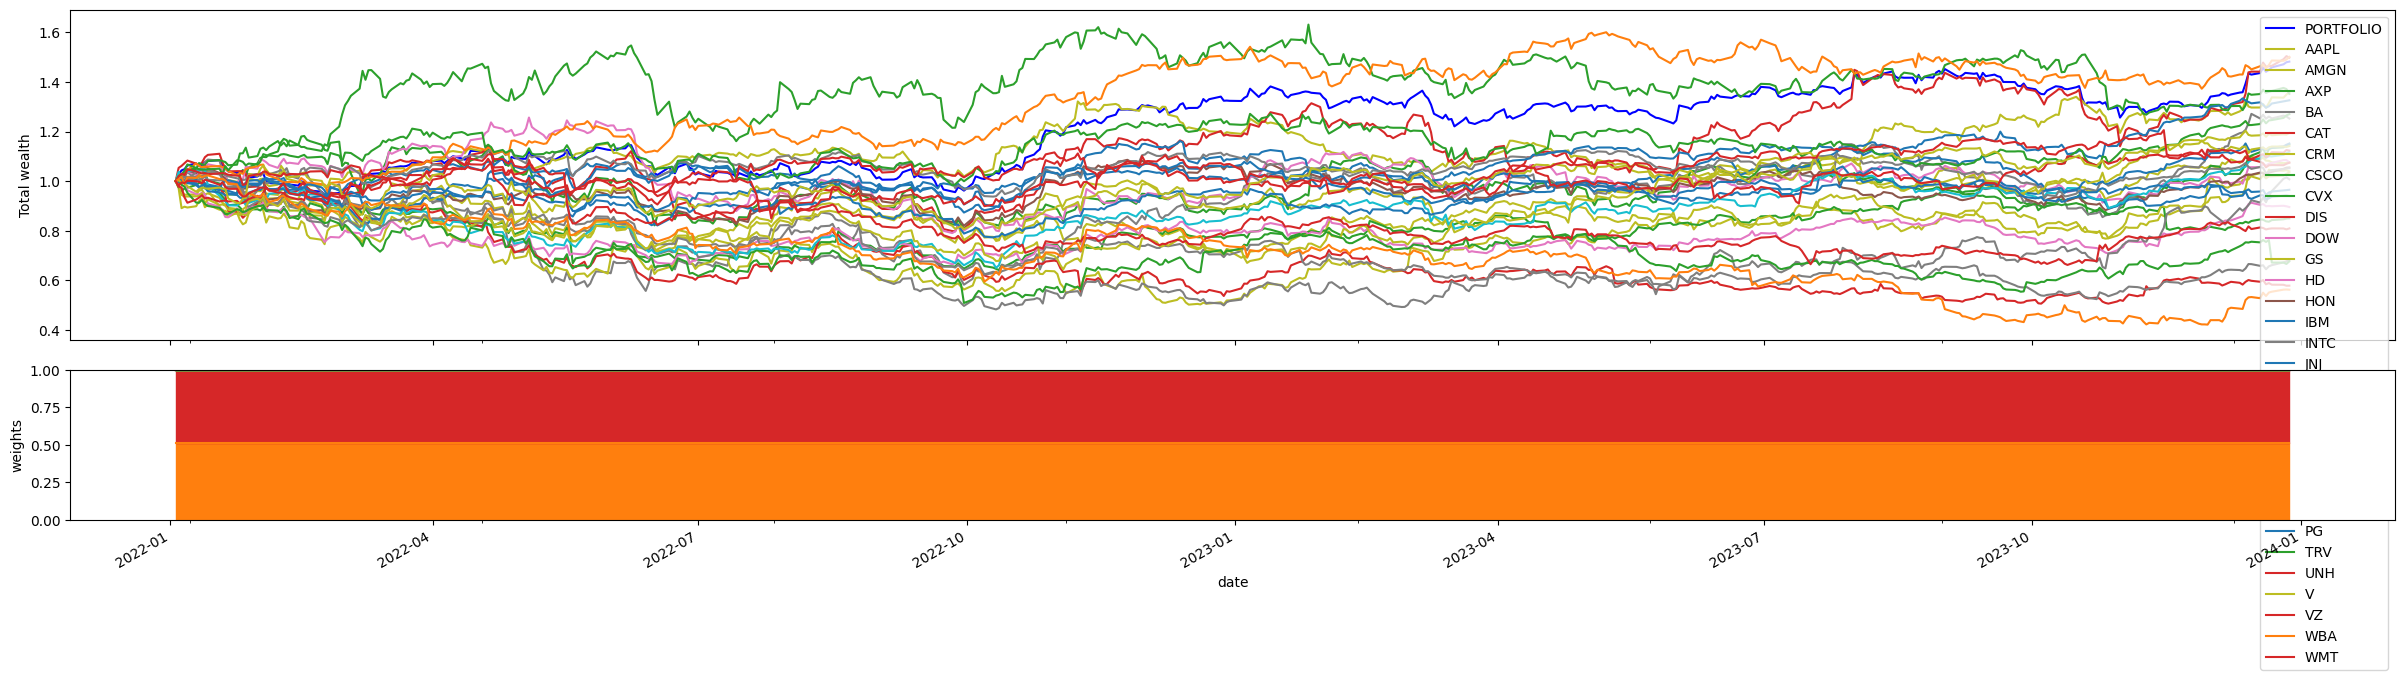

In [38]:
algo = BCRP(no_cash=True)
result_fee = algo.run(pivot_df)


# Here try setting a transaction fee
# Doesnt seem to do anything on BCRP becuase it doesn really change stocks
result_fee.fee = 0.01



bcrp_B_fee = result_fee.B
bcrp_X_fee = result_fee.X
print(result_fee.summary())
result_fee.plot();

Net Worth Over Time:
date
2022-01-03    1.000000e+06
2022-01-04    1.026831e+06
2022-01-05    1.043365e+06
2022-01-06    1.048224e+06
2022-01-07    1.063274e+06
                  ...     
2023-12-21    1.466093e+06
2023-12-22    1.475994e+06
2023-12-26    1.488567e+06
2023-12-27    1.497174e+06
2023-12-28    1.499684e+06
Length: 500, dtype: float64
             date        open        high         low       close     volume  \
0      2022-01-03  177.830002  182.880005  177.710007  179.273621  104487900   
1      2022-01-03  223.630005  226.970001  222.029999  207.807144    2742800   
2      2022-01-03  164.509995  168.399994  164.399994  161.699921    3236400   
3      2022-01-03  204.000000  210.550003  203.339996  207.860001    9060200   
4      2022-01-03  207.330002  208.600006  205.800003  195.760956    2055600   
...           ...         ...         ...         ...         ...        ...   
14995  2023-12-28  523.469971  527.869995  522.940002  518.790710    2001000   
14996  20

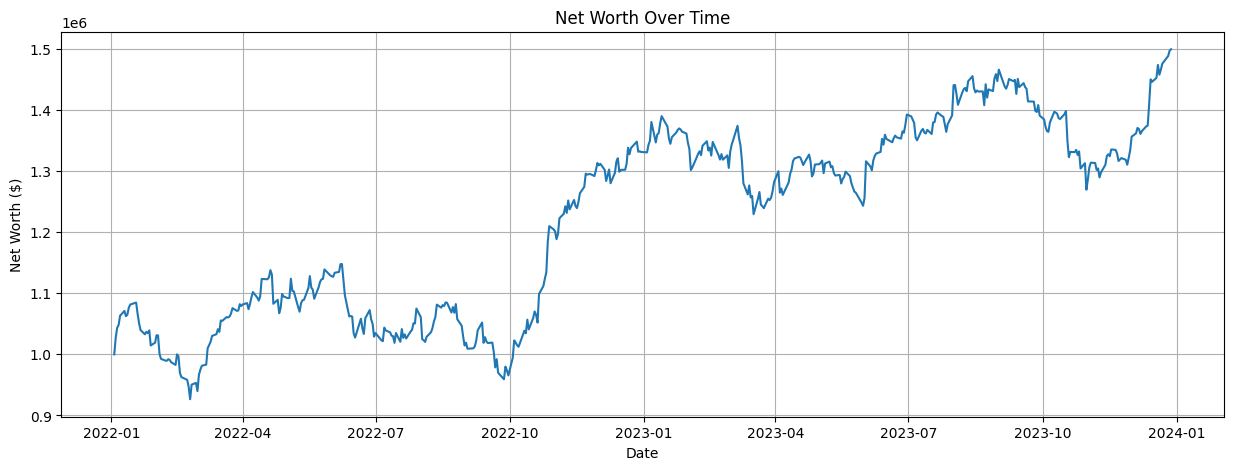

In [39]:


# # Example DataFrame for price relatives (X)
# X = pd.DataFrame({
#     'AAPL': [0.01, 0.02, -0.01],
#     'GOOG': [0.02, 0.01, 0.03],
#     'IBM': [-0.01, 0.03, 0.02],
#     'MSFT': [0.03, 0.00, 0.01]
# }, index=pd.date_range(start='2020-01-01', periods=3))

# print(X)

# # Example DataFrame for portfolio weights (B)
# B = pd.DataFrame({
#     'AAPL': [0.25, 0.25, 0.00],
#     'GOOG': [0.25, 0.25, 1.00],
#     'IBM':  [0.25, 0.25, 0.00],
#     'MSFT': [0.25, 0.25, 0.00]
# }, index=pd.date_range(start='2020-01-01', periods=3))

# print(B)

# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time
net_worth_bcrp_fee = calculate_final_investment(bcrp_X_fee, bcrp_B_fee, initial_investment)

print("Net Worth Over Time:")
print(net_worth_bcrp_fee)

s = pd.Series(net_worth_bcrp_fee, name='BCRP')

# Convert Series to DataFrame
olmar_bcrp_df = s.to_frame()

print(df)

# Plotting the net worth over time
plt.plot(net_worth_bcrp_fee.index, net_worth_bcrp_fee)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

Net Worth Over Time:
date
2022-01-03    1.000000e+06
2022-01-04    1.026831e+06
2022-01-05    1.043365e+06
2022-01-06    1.048224e+06
2022-01-07    1.063274e+06
                  ...     
2023-12-21    1.466093e+06
2023-12-22    1.475994e+06
2023-12-26    1.488567e+06
2023-12-27    1.497174e+06
2023-12-28    1.499684e+06
Length: 500, dtype: float64
             date        open        high         low       close     volume  \
0      2022-01-03  177.830002  182.880005  177.710007  179.273621  104487900   
1      2022-01-03  223.630005  226.970001  222.029999  207.807144    2742800   
2      2022-01-03  164.509995  168.399994  164.399994  161.699921    3236400   
3      2022-01-03  204.000000  210.550003  203.339996  207.860001    9060200   
4      2022-01-03  207.330002  208.600006  205.800003  195.760956    2055600   
...           ...         ...         ...         ...         ...        ...   
14995  2023-12-28  523.469971  527.869995  522.940002  518.790710    2001000   
14996  20

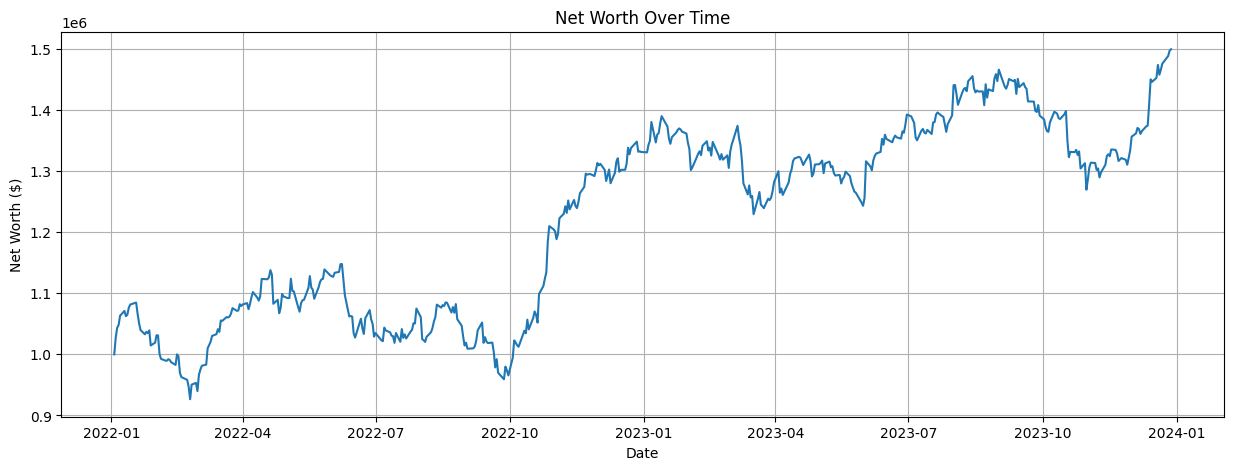

In [40]:
import pandas as pd
import numpy as np

# # Example DataFrame for price relatives (X)
# X = pd.DataFrame({
#     'AAPL': [0.01, 0.02, -0.01],
#     'GOOG': [0.02, 0.01, 0.03],
#     'IBM': [-0.01, 0.03, 0.02],
#     'MSFT': [0.03, 0.00, 0.01]
# }, index=pd.date_range(start='2020-01-01', periods=3))

# print(X)

# # Example DataFrame for portfolio weights (B)
# B = pd.DataFrame({
#     'AAPL': [0.25, 0.25, 0.00],
#     'GOOG': [0.25, 0.25, 1.00],
#     'IBM':  [0.25, 0.25, 0.00],
#     'MSFT': [0.25, 0.25, 0.00]
# }, index=pd.date_range(start='2020-01-01', periods=3))

# print(B)

# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time
net_worth_bcrp = calculate_final_investment(bcrp_X, bcrp_B, initial_investment)

print("Net Worth Over Time:")
print(net_worth_bcrp)

s = pd.Series(net_worth_bcrp, name='BCRP')

# Convert Series to DataFrame
bcrp_df = s.to_frame()

print(df)

# Plotting the net worth over time
plt.plot(net_worth_bcrp.index, net_worth_bcrp)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

                ensemble           dji          BCRP
date                                                
2022-01-03  1.000000e+06  1.000000e+06  1.000000e+06
2022-01-04  1.002260e+06  1.005866e+06  1.026831e+06
2022-01-05  9.960529e+05  9.951360e+05  1.043365e+06
2022-01-06  9.907973e+05  9.904718e+05  1.048224e+06
2022-01-07  9.889800e+05  9.903404e+05  1.063274e+06
...                  ...           ...           ...
2023-12-21  8.409294e+05  1.022394e+06  1.466093e+06
2023-12-22  8.442635e+05  1.021892e+06  1.475994e+06
2023-12-26  8.451490e+05  1.026248e+06  1.488567e+06
2023-12-27  8.474781e+05  1.029287e+06  1.497174e+06
2023-12-28  8.500149e+05  1.030751e+06  1.499684e+06

[500 rows x 3 columns]


<Figure size 1500x500 with 0 Axes>

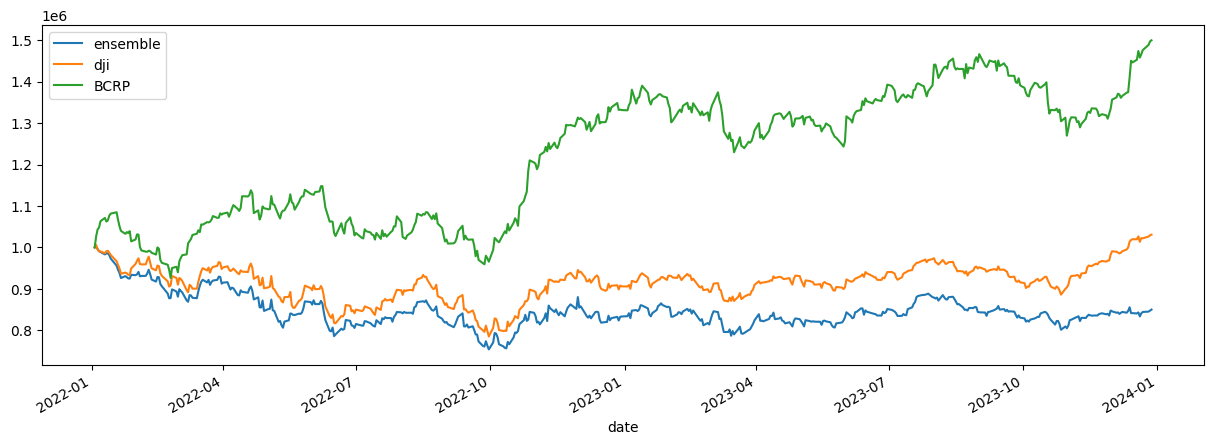

In [41]:
result = pd.DataFrame()
result = pd.read_csv("result20222023.csv")

result.set_index('date', inplace=True)

result.index = pd.to_datetime(result.index)

bcrp_df.index = pd.to_datetime(bcrp_df.index)

# Join DataFrames on date index
merged_df = result.join(bcrp_df, how='inner')
print(merged_df)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
merged_df.plot();

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.04
    Sharpe ratio: 0.32 ± 0.73
    Ulcer index: 0.65
    Information ratio (wrt benchmark): 0.00
    Benchmark sharpe: 0.32 ± 0.73
    Appraisal ratio (wrt benchmark): -0.00 ± 0.79
    Beta / Alpha: 1.00 / -0.000%
    Annualized return: 5.21%
    Annualized volatility: 16.35%
    Longest drawdown: 389 days
    Max drawdown: 21.53%
    Winning days: 51.5%
    Annual turnover: 2.4
        


c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.04
    Sharpe ratio: 0.30 ± 0.73
    Ulcer index: 0.61
    Information ratio (wrt benchmark): -48.63
    Benchmark sharpe: 0.32 ± 0.73
    Appraisal ratio (wrt benchmark): -2.26 ± 0.72
    Beta / Alpha: 1.00 / -0.237%
    Annualized return: 4.97%
    Annualized volatility: 16.35%
    Longest drawdown: 478 days
    Max drawdown: 21.68%
    Winning days: 51.3%
    Annual turnover: 2.4
        


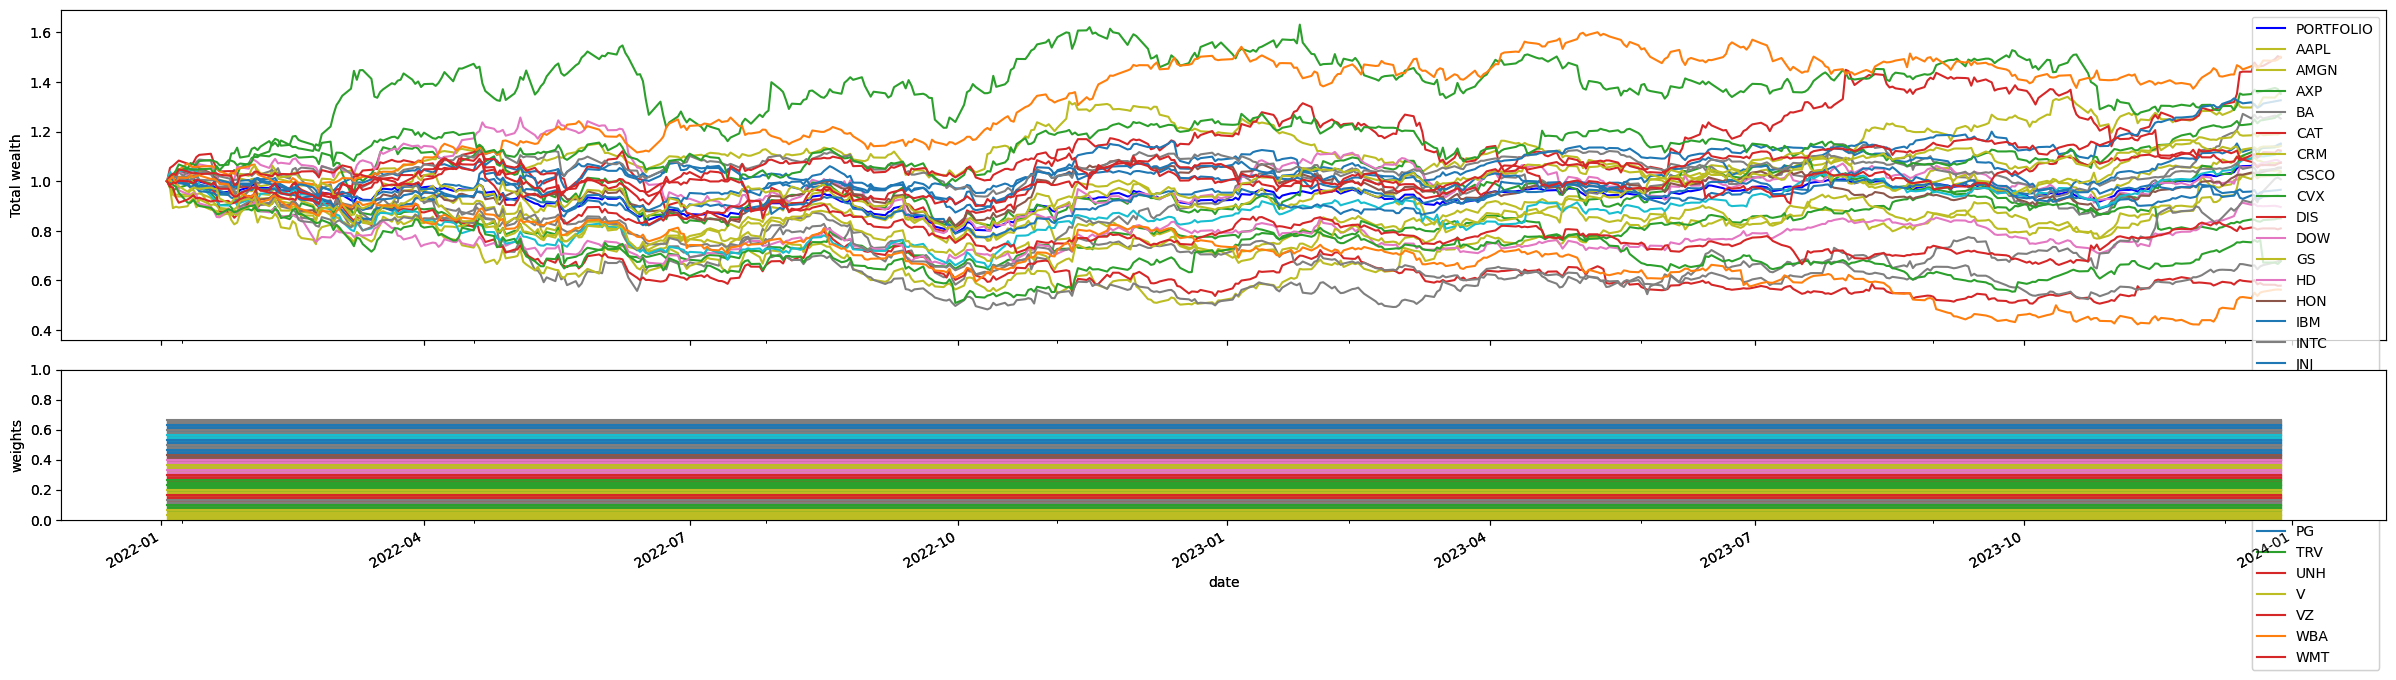

In [42]:
algo = CRP()
result = algo.run(pivot_df)

crp_B = result.B
crp_X = result.X
print(result.summary())
result.plot();



# Here try setting a transaction fee
result.fee = 0.001



crp_B_fee = result.B
crp_X_fee = result.X
print(result.summary())
result.plot();

Net Worth Over Time:
date
2022-01-03    1.000000e+06
2022-01-04    1.007582e+06
2022-01-05    1.001568e+06
2022-01-06    9.987638e+05
2022-01-07    1.002815e+06
                  ...     
2023-12-21    1.022099e+06
2023-12-22    1.021076e+06
2023-12-26    1.027291e+06
2023-12-27    1.029610e+06
2023-12-28    1.030707e+06
Length: 500, dtype: float64
             date        open        high         low       close     volume  \
0      2022-01-03  177.830002  182.880005  177.710007  179.273621  104487900   
1      2022-01-03  223.630005  226.970001  222.029999  207.807144    2742800   
2      2022-01-03  164.509995  168.399994  164.399994  161.699921    3236400   
3      2022-01-03  204.000000  210.550003  203.339996  207.860001    9060200   
4      2022-01-03  207.330002  208.600006  205.800003  195.760956    2055600   
...           ...         ...         ...         ...         ...        ...   
14995  2023-12-28  523.469971  527.869995  522.940002  518.790710    2001000   
14996  20

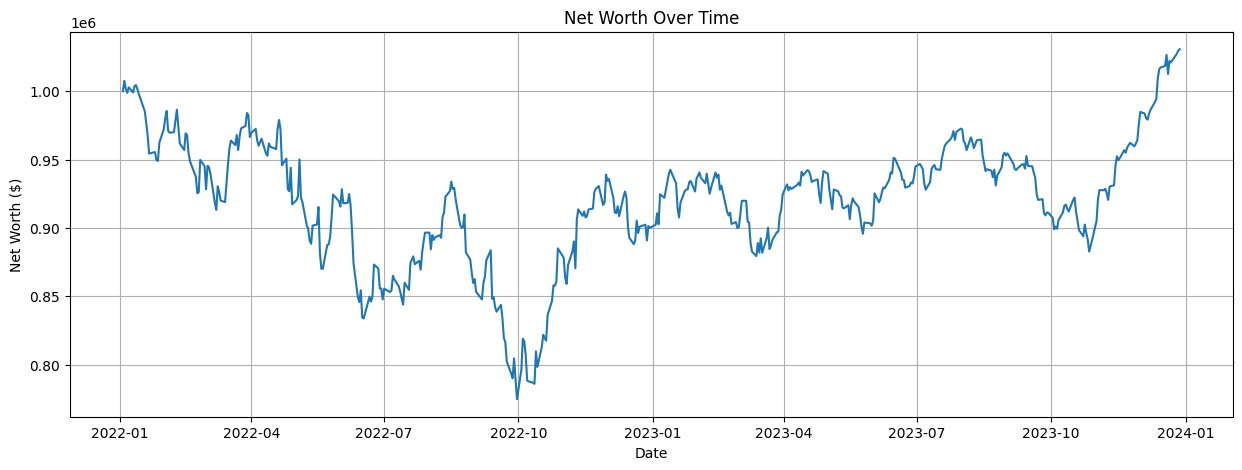

In [43]:
# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time
net_worth_crp = calculate_final_investment(crp_X, crp_B, initial_investment)

print("Net Worth Over Time:")
print(net_worth_crp)

s = pd.Series(net_worth_crp, name='CRP')

# Convert Series to DataFrame
crp_df = s.to_frame()

print(df)

# Plotting the net worth over time
plt.plot(net_worth_crp.index, net_worth_crp)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

# How do we handle transaction cost here for online

The widely adopted transaction costs model is the proportional transaction costs model in which the incurred transaction cost is proportional
to the wealth transferred during rebalancing.

In [44]:
# algo = TCO1(no_cash=True)
# result = algo.run(list_result)

# tco_B = result.B
# print(result.B)
# tco_X = result.X
# print(result.X)
# print(result.summary())
# result.plot();

In [45]:
# # Initial investment amount
# initial_investment = 1000000

# # Calculate final investment amount
# # Calculate the net worth over time
# net_worth_tco = calculate_final_investment(tco_X, tco_B, initial_investment, 0 ,0)

# print("Net Worth Over Time:")
# print(net_worth_tco)

# s = pd.Series(net_worth_tco, name='OLMAR_tco')

# # Convert Series to DataFrame
# olmar_tco_df = s.to_frame()

# print(df)

# # Plotting the net worth over time
# plt.plot(net_worth_tco.index, net_worth_tco)
# plt.xlabel('Date')
# plt.ylabel('Net Worth ($)')
# plt.title('Net Worth Over Time')
# plt.grid(True)
# plt.show()


# result = pd.DataFrame()
# result = pd.read_csv("result.csv")

# result.set_index('date', inplace=True)

# print(result)
# print(result.dtypes)
# result.index = pd.to_datetime(result.index)

# print(olmar_tco_df)
# print(result.dtypes)
# olmar_tco_df.index = pd.to_datetime(olmar_tco_df.index)

# # Join DataFrames on date index
# merged_df = result.join(olmar_tco_df, how='inner')
# print(merged_df)


# %matplotlib inline
# plt.rcParams["figure.figsize"] = (15,5)
# plt.figure();
# merged_df.plot();

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.04
    Sharpe ratio: 0.32 ± 0.73
    Ulcer index: 0.65
    Information ratio (wrt benchmark): -0.43
    Benchmark sharpe: 0.32 ± 0.73
    Appraisal ratio (wrt benchmark): -0.12 ± 0.71
    Beta / Alpha: 1.00 / -0.018%
    Annualized return: 5.18%
    Annualized volatility: 16.33%
    Longest drawdown: 389 days
    Max drawdown: 21.50%
    Winning days: 51.3%
    Annual turnover: 2.3
        


c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.04
    Sharpe ratio: 0.30 ± 0.73
    Ulcer index: 0.61
    Information ratio (wrt benchmark): -4.51
    Benchmark sharpe: 0.32 ± 0.73
    Appraisal ratio (wrt benchmark): -1.62 ± 0.71
    Beta / Alpha: 1.00 / -0.248%
    Annualized return: 4.95%
    Annualized volatility: 16.33%
    Longest drawdown: 478 days
    Max drawdown: 21.65%
    Winning days: 51.3%
    Annual turnover: 2.3
        


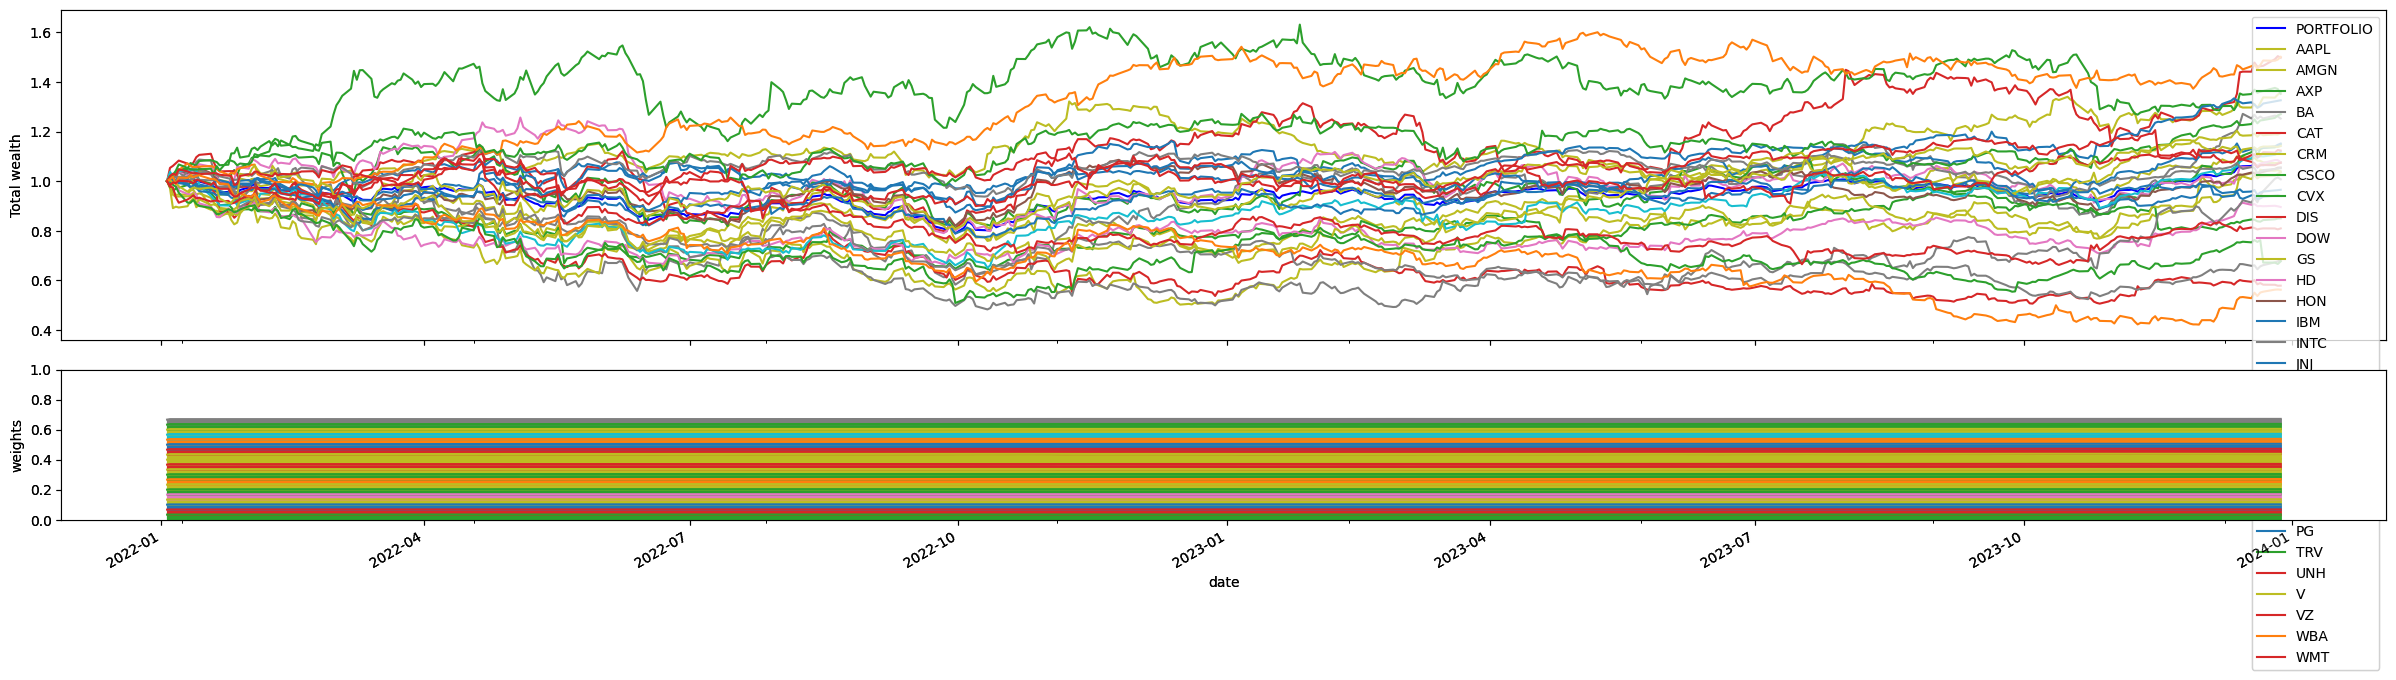

In [46]:
algo = UP()
result = algo.run(pivot_df)

up_B_fee = result.B
up_X_fee = result.X
print(result.summary())
result.plot();

result_fee = result


# Here try setting a transaction fee
result_fee.fee = 0.001



up_B_fee = result_fee.B
up_X_fee = result_fee.X
print(result_fee.summary())
result_fee.plot();

Net Worth Over Time:
date
2022-01-03    1.000000e+06
2022-01-04    1.007514e+06
2022-01-05    1.001440e+06
2022-01-06    9.986097e+05
2022-01-07    1.002641e+06
                  ...     
2023-12-21    1.021363e+06
2023-12-22    1.020414e+06
2023-12-26    1.026594e+06
2023-12-27    1.028925e+06
2023-12-28    1.030009e+06
Length: 500, dtype: float64


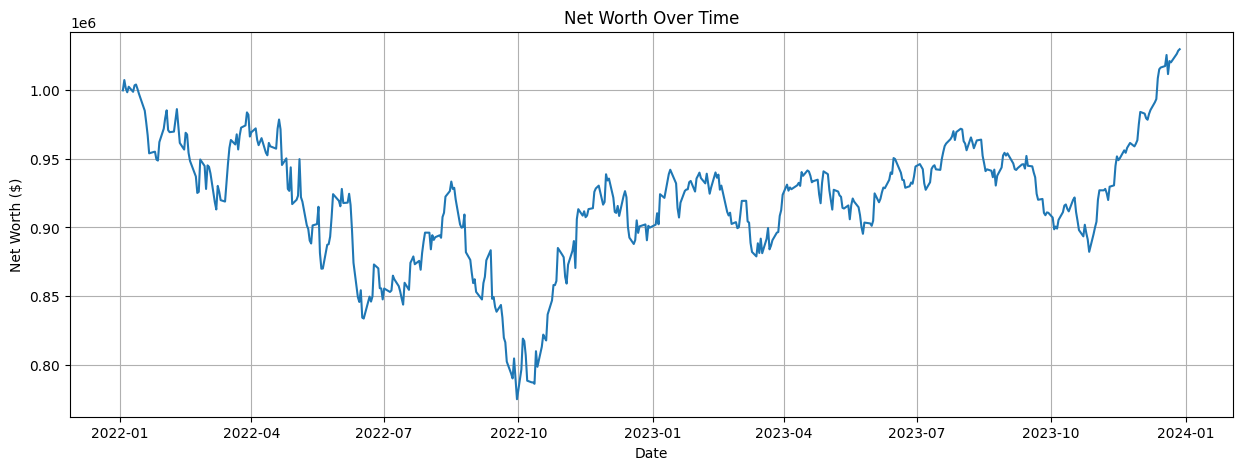

In [47]:
# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time
net_worth_up = calculate_final_investment(up_X_fee, up_B_fee, initial_investment, 0.001, 0.001)

print("Net Worth Over Time:")
print(net_worth_up)

s = pd.Series(net_worth_up, name='up')

# Convert Series to DataFrame
up_df_fee = s.to_frame()

# Plotting the net worth over time
plt.plot(net_worth_up.index, net_worth_up)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

                ensemble           dji            up
date                                                
2022-01-03  1.000000e+06  1.000000e+06  1.000000e+06
2022-01-04  1.002260e+06  1.005866e+06  1.007514e+06
2022-01-05  9.960529e+05  9.951360e+05  1.001440e+06
2022-01-06  9.907973e+05  9.904718e+05  9.986097e+05
2022-01-07  9.889800e+05  9.903404e+05  1.002641e+06
...                  ...           ...           ...
2023-12-21  8.409294e+05  1.022394e+06  1.021363e+06
2023-12-22  8.442635e+05  1.021892e+06  1.020414e+06
2023-12-26  8.451490e+05  1.026248e+06  1.026594e+06
2023-12-27  8.474781e+05  1.029287e+06  1.028925e+06
2023-12-28  8.500149e+05  1.030751e+06  1.030009e+06

[500 rows x 3 columns]


<Figure size 1500x500 with 0 Axes>

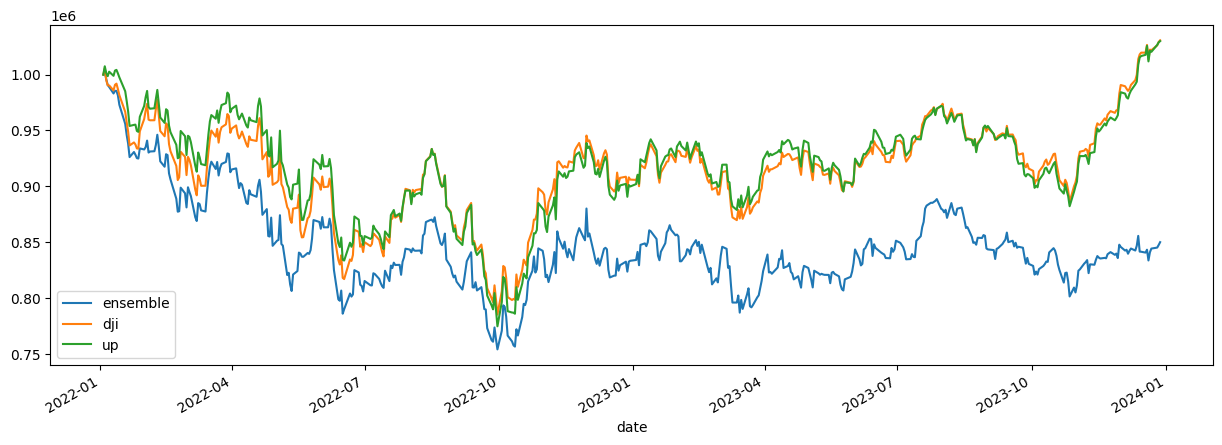

In [48]:
# TODO follow up on this??? How do I factor in the transaction cost here?

result = pd.DataFrame()

# TODO Change result period to use saved file
result = pd.read_csv(ensemble_result_file)

result.set_index('date', inplace=True)

result.index = pd.to_datetime(result.index)

up_df_fee.index = pd.to_datetime(up_df_fee.index)

# Join DataFrames on date index
merged_df = result.join(up_df_fee, how='inner')
print(merged_df)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
merged_df.plot();

[*********************100%***********************]  1 of 1 completed

==============Get Baseline Stats===========
Shape of DataFrame:  (499, 8)
Annual return          0.014684
Cumulative returns     0.029287
Annual volatility      0.162186
Sharpe ratio           0.171061
Calmar ratio           0.066928
Stability              0.092293
Max drawdown          -0.219408
Omega ratio            1.029306
Sortino ratio          0.242167
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.010471
Daily value at risk   -0.020323
dtype: float64
df_dji:            date           dji
0   2022-01-03  1.000000e+06
1   2022-01-04  1.005866e+06
2   2022-01-05  9.951360e+05
3   2022-01-06  9.904718e+05
4   2022-01-07  9.903404e+05
..         ...           ...
495 2023-12-21  1.022394e+06
496 2023-12-22  1.021892e+06
497 2023-12-26  1.026248e+06
498 2023-12-27  1.029287e+06
499 2023-12-28           NaN

[500 rows x 2 columns]
df_dji:                       dji
date                    
2022-01-03  1.000000e+06
2022-01-04  1.005866e+06
2022-

<Figure size 1500x500 with 0 Axes>

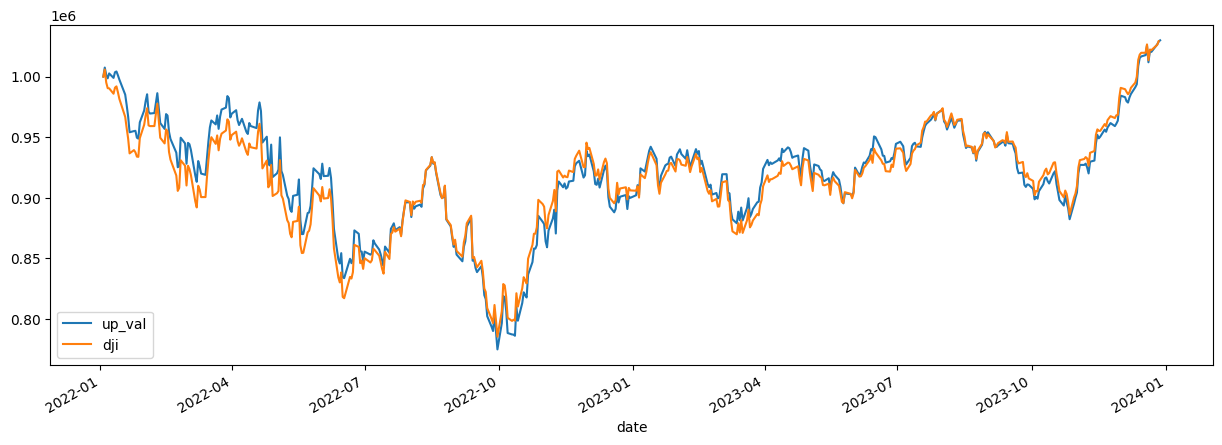

In [49]:
# Try comparing against baseline without ensemble


from finrl.plot import backtest_stats,  get_baseline

first_date = up_df_fee.index.min()
last_date = up_df_fee.index.max()

print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = first_date,
        end = last_date)

stats = backtest_stats(df_dji_, value_col_name = 'close')


df_dji = pd.DataFrame()
df_dji['date'] = up_df_fee.index
df_dji['dji'] = df_dji_['close'] / df_dji_['close'][0] * initial_investment
print("df_dji: ", df_dji)
df_dji = df_dji.set_index(df_dji.columns[0])
print("df_dji: ", df_dji)


df_result_up = pd.DataFrame({'date': up_df_fee.index, 'up_val': up_df_fee['up']})
df_result_up = df_result_up.set_index('date')

print("df_result_up.columns: ", df_result_up.columns)

print("df_result_up: ", df_result_up)
print("==============Compare to DJIA===========")
result = pd.DataFrame()

result = pd.merge(df_result_up, df_dji, left_index=True, right_index=True)
print("result: ", result)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();


# BAH basline

=====================

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.03
    Sharpe ratio: 0.27 ± 0.72
    Ulcer index: 0.52
    Information ratio (wrt benchmark): -0.69
    Benchmark sharpe: 0.32 ± 0.73
    Appraisal ratio (wrt benchmark): -0.57 ± 0.71
    Beta / Alpha: 0.95 / -0.783%
    Annualized return: 4.17%
    Annualized volatility: 15.59%
    Longest drawdown: 479 days
    Max drawdown: 21.12%
    Winning days: 51.9%
    Annual turnover: 0.0
        


c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.03
    Sharpe ratio: 0.27 ± 0.72
    Ulcer index: 0.52
    Information ratio (wrt benchmark): -0.69
    Benchmark sharpe: 0.32 ± 0.73
    Appraisal ratio (wrt benchmark): -0.57 ± 0.71
    Beta / Alpha: 0.95 / -0.783%
    Annualized return: 4.17%
    Annualized volatility: 15.59%
    Longest drawdown: 479 days
    Max drawdown: 21.12%
    Winning days: 51.9%
    Annual turnover: 0.0
        


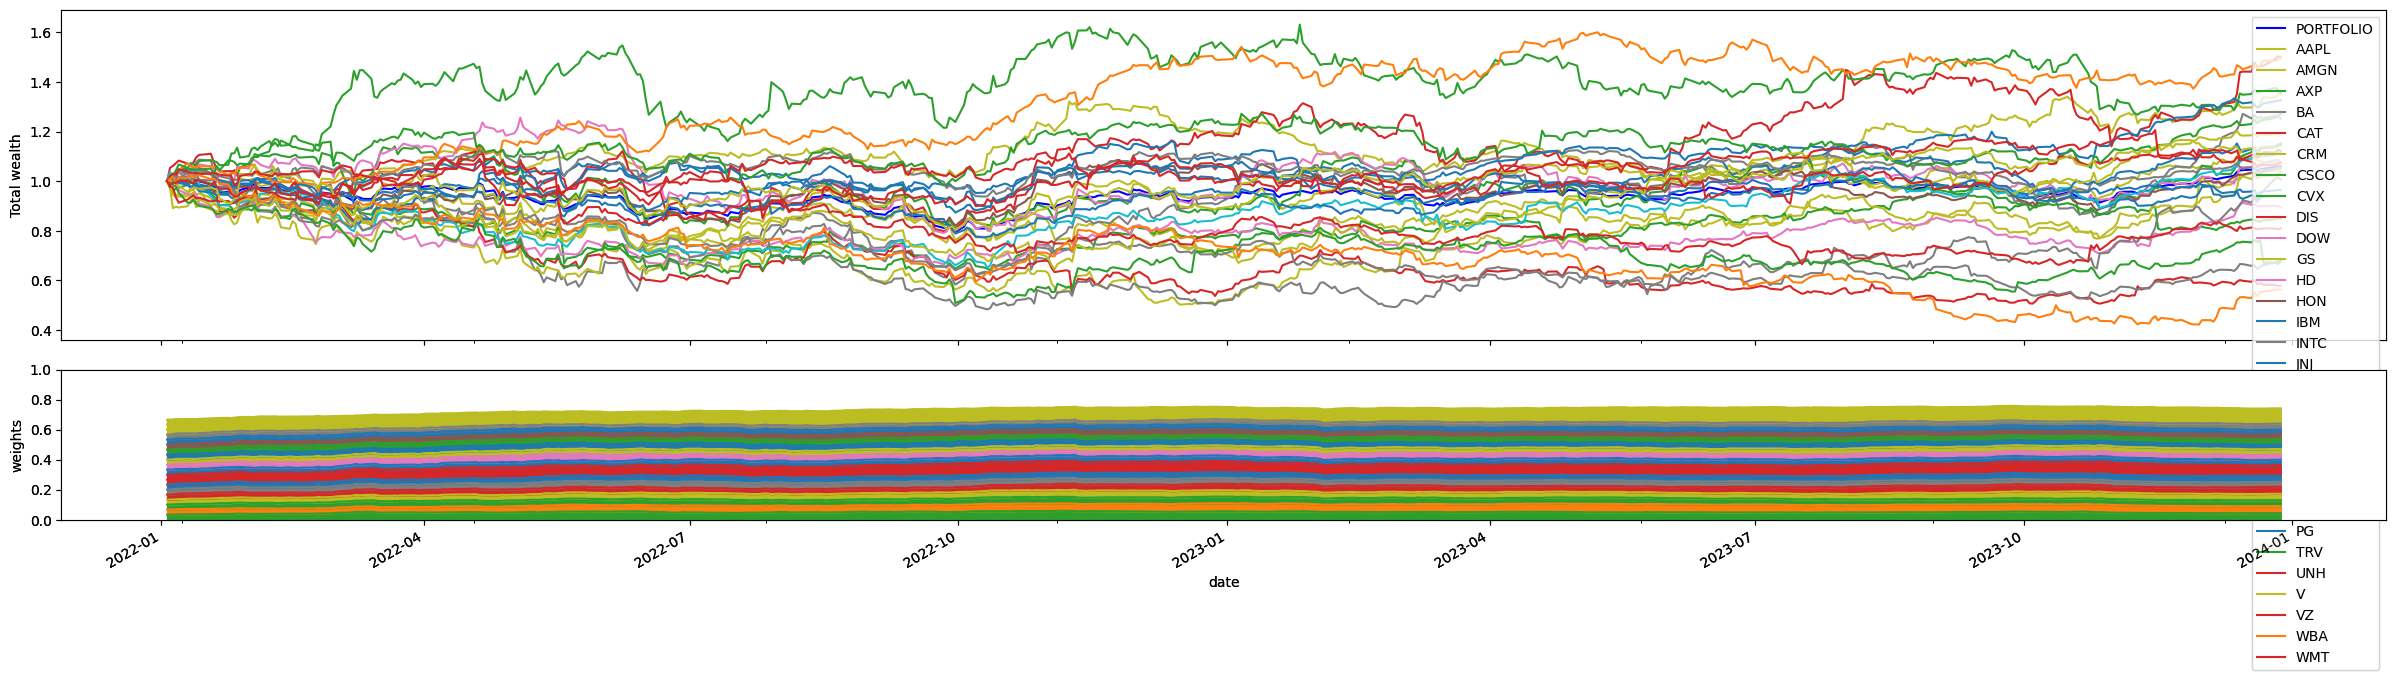

In [50]:
algo = BAH()
result = algo.run(pivot_df)

bah_B = result.B
bah_X = result.X
print(result.summary())
result.plot();

result_fee = result


# Here try setting a transaction fee
result_fee.fee = 0.001



bah_B_fee = result_fee.B
bah_X_fee = result_fee.X
print(result_fee.summary())
result_fee.plot();

Net Worth Over Time:
date
2022-01-03    1.000000e+06
2022-01-04    1.007582e+06
2022-01-05    1.001667e+06
2022-01-06    9.988740e+05
2022-01-07    1.003140e+06
                  ...     
2023-12-21    9.953527e+05
2023-12-22    9.956893e+05
2023-12-26    1.001598e+06
2023-12-27    1.004260e+06
2023-12-28    1.005039e+06
Length: 500, dtype: float64


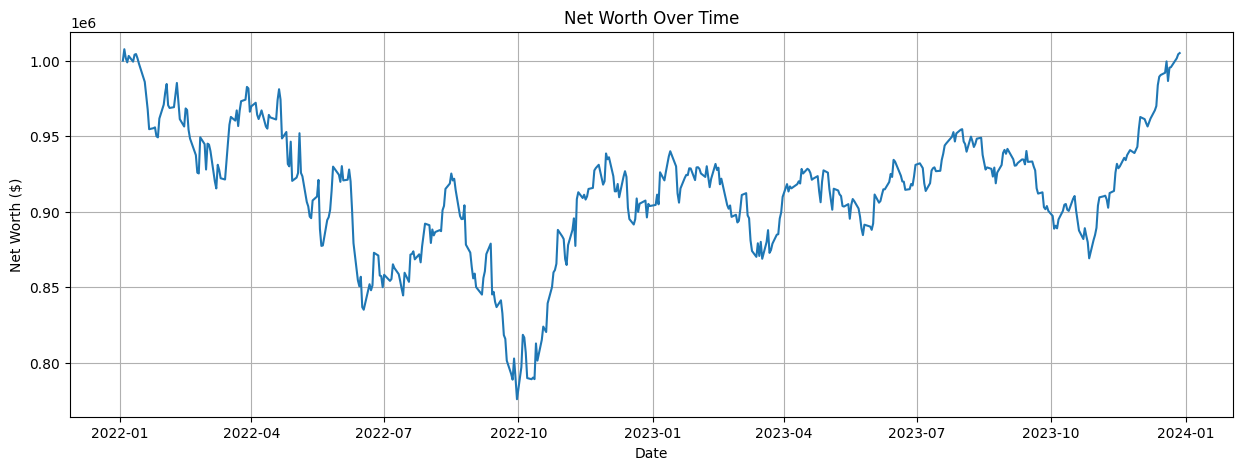

In [51]:
# Initial investment amount
initial_investment = 1000000

# Calculate final investment amount
# Calculate the net worth over time
net_worth_bah = calculate_final_investment(bah_X_fee, bah_B_fee, initial_investment, 0.001, 0.001)

print("Net Worth Over Time:")
print(net_worth_bah)

s = pd.Series(net_worth_bah, name='bah')

# Convert Series to DataFrame
bah_df_fee = s.to_frame()

# Plotting the net worth over time
plt.plot(net_worth_bah.index, net_worth_bah)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed

==============Get Baseline Stats===========
Shape of DataFrame:  (499, 8)
Annual return          0.014684
Cumulative returns     0.029287
Annual volatility      0.162186
Sharpe ratio           0.171061
Calmar ratio           0.066928
Stability              0.092293
Max drawdown          -0.219408
Omega ratio            1.029306
Sortino ratio          0.242167
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.010471
Daily value at risk   -0.020323
dtype: float64
df_dji:            date           dji
0   2022-01-03  1.000000e+06
1   2022-01-04  1.005866e+06
2   2022-01-05  9.951360e+05
3   2022-01-06  9.904718e+05
4   2022-01-07  9.903404e+05
..         ...           ...
495 2023-12-21  1.022394e+06
496 2023-12-22  1.021892e+06
497 2023-12-26  1.026248e+06
498 2023-12-27  1.029287e+06
499 2023-12-28           NaN

[500 rows x 2 columns]
df_dji:                       dji
date                    
2022-01-03  1.000000e+06
2022-01-04  1.005866e+06
2022-

<Figure size 1500x500 with 0 Axes>

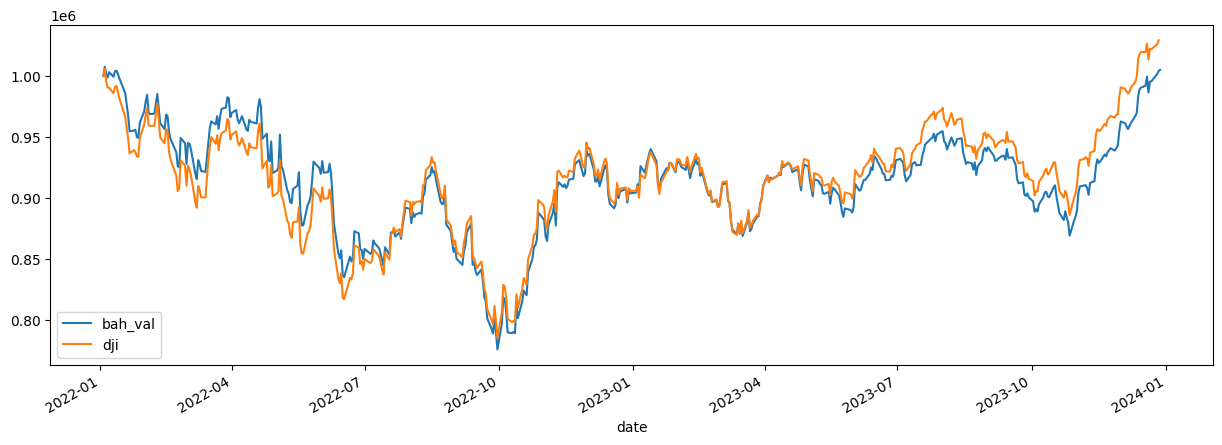

In [52]:
from finrl.plot import backtest_stats,  get_baseline

first_date = bah_df_fee.index.min()
last_date = bah_df_fee.index.max()

print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = first_date,
        end = last_date)

stats = backtest_stats(df_dji_, value_col_name = 'close')


df_dji = pd.DataFrame()
df_dji['date'] = bah_df_fee.index
df_dji['dji'] = df_dji_['close'] / df_dji_['close'][0] * initial_investment
print("df_dji: ", df_dji)
df_dji = df_dji.set_index(df_dji.columns[0])
print("df_dji: ", df_dji)


df_result_bah = pd.DataFrame({'date': bah_df_fee.index, 'bah_val': bah_df_fee['bah']})
df_result_bah = df_result_bah.set_index('date')

print("df_result_bah.columns: ", df_result_bah.columns)

print("df_result_bah: ", df_result_bah)
print("==============Compare to DJIA===========")
result = pd.DataFrame()

result = pd.merge(df_result_bah, df_dji, left_index=True, right_index=True)
print("result: ", result)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();